In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/devices-error-detection-acmud-2025/sample_submission.csv
/kaggle/input/devices-error-detection-acmud-2025/train.csv
/kaggle/input/devices-error-detection-acmud-2025/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/devices-error-detection-acmud-2025/train.csv')
df

,ID,time,uid,serial,model,temperature,cpu_usage,gpu_usage,upload_usage,download_usage,performance
0,0,0,0,3eaefe1b24bea36cb4accb136e7f6f3c,C,3.943849,0.498604,0.291258,0.724379,0.107881,1.000
1,1,0,1,48006737b050c2143fb5c369f41b5f75,A,3.943849,0.845603,0.518143,0.708684,0.009955,1.000
2,2,0,2,f2747d3f693b6453dc09b77edb46be6c,C,3.943849,0.075949,0.838743,0.564937,0.688424,1.000
3,3,0,3,ac58645c928c33a1ae2eeba8d203dade,B,3.943849,0.077407,0.686753,0.804593,0.062835,1.000
4,4,0,4,87b4dc2eb0f18004b051c414bcab7fca,B,3.943849,0.481766,0.442025,0.006727,0.665060,1.000
...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,499,25,1f772090dada3555ae5acd272b4e0a7e,B,90.000000,243.609056,269.060143,0.436031,0.120899,0.208
14996,14996,499,26,21e2f88ac6f61f0654d8a6bc613c6dc9,A,90.000000,241.890345,249.286210,0.352901,0.544579,0.218
14997,14997,499,27,137e8d0422026c443caee435a4bad05a,C,90.000000,246.126026,249.868530,0.995627,0.770770,0.240
14998,14998,499,28,b37febd9281aaa1fb1e96ce4332be04a,C,90.000000,240.052671,236.176575,0.915995,0.527004,0.232


array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'uid'}>],
       [<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'cpu_usage'}>,
        <Axes: title={'center': 'gpu_usage'}>],
       [<Axes: title={'center': 'upload_usage'}>,
        <Axes: title={'center': 'download_usage'}>,
        <Axes: title={'center': 'performance'}>]], dtype=object)

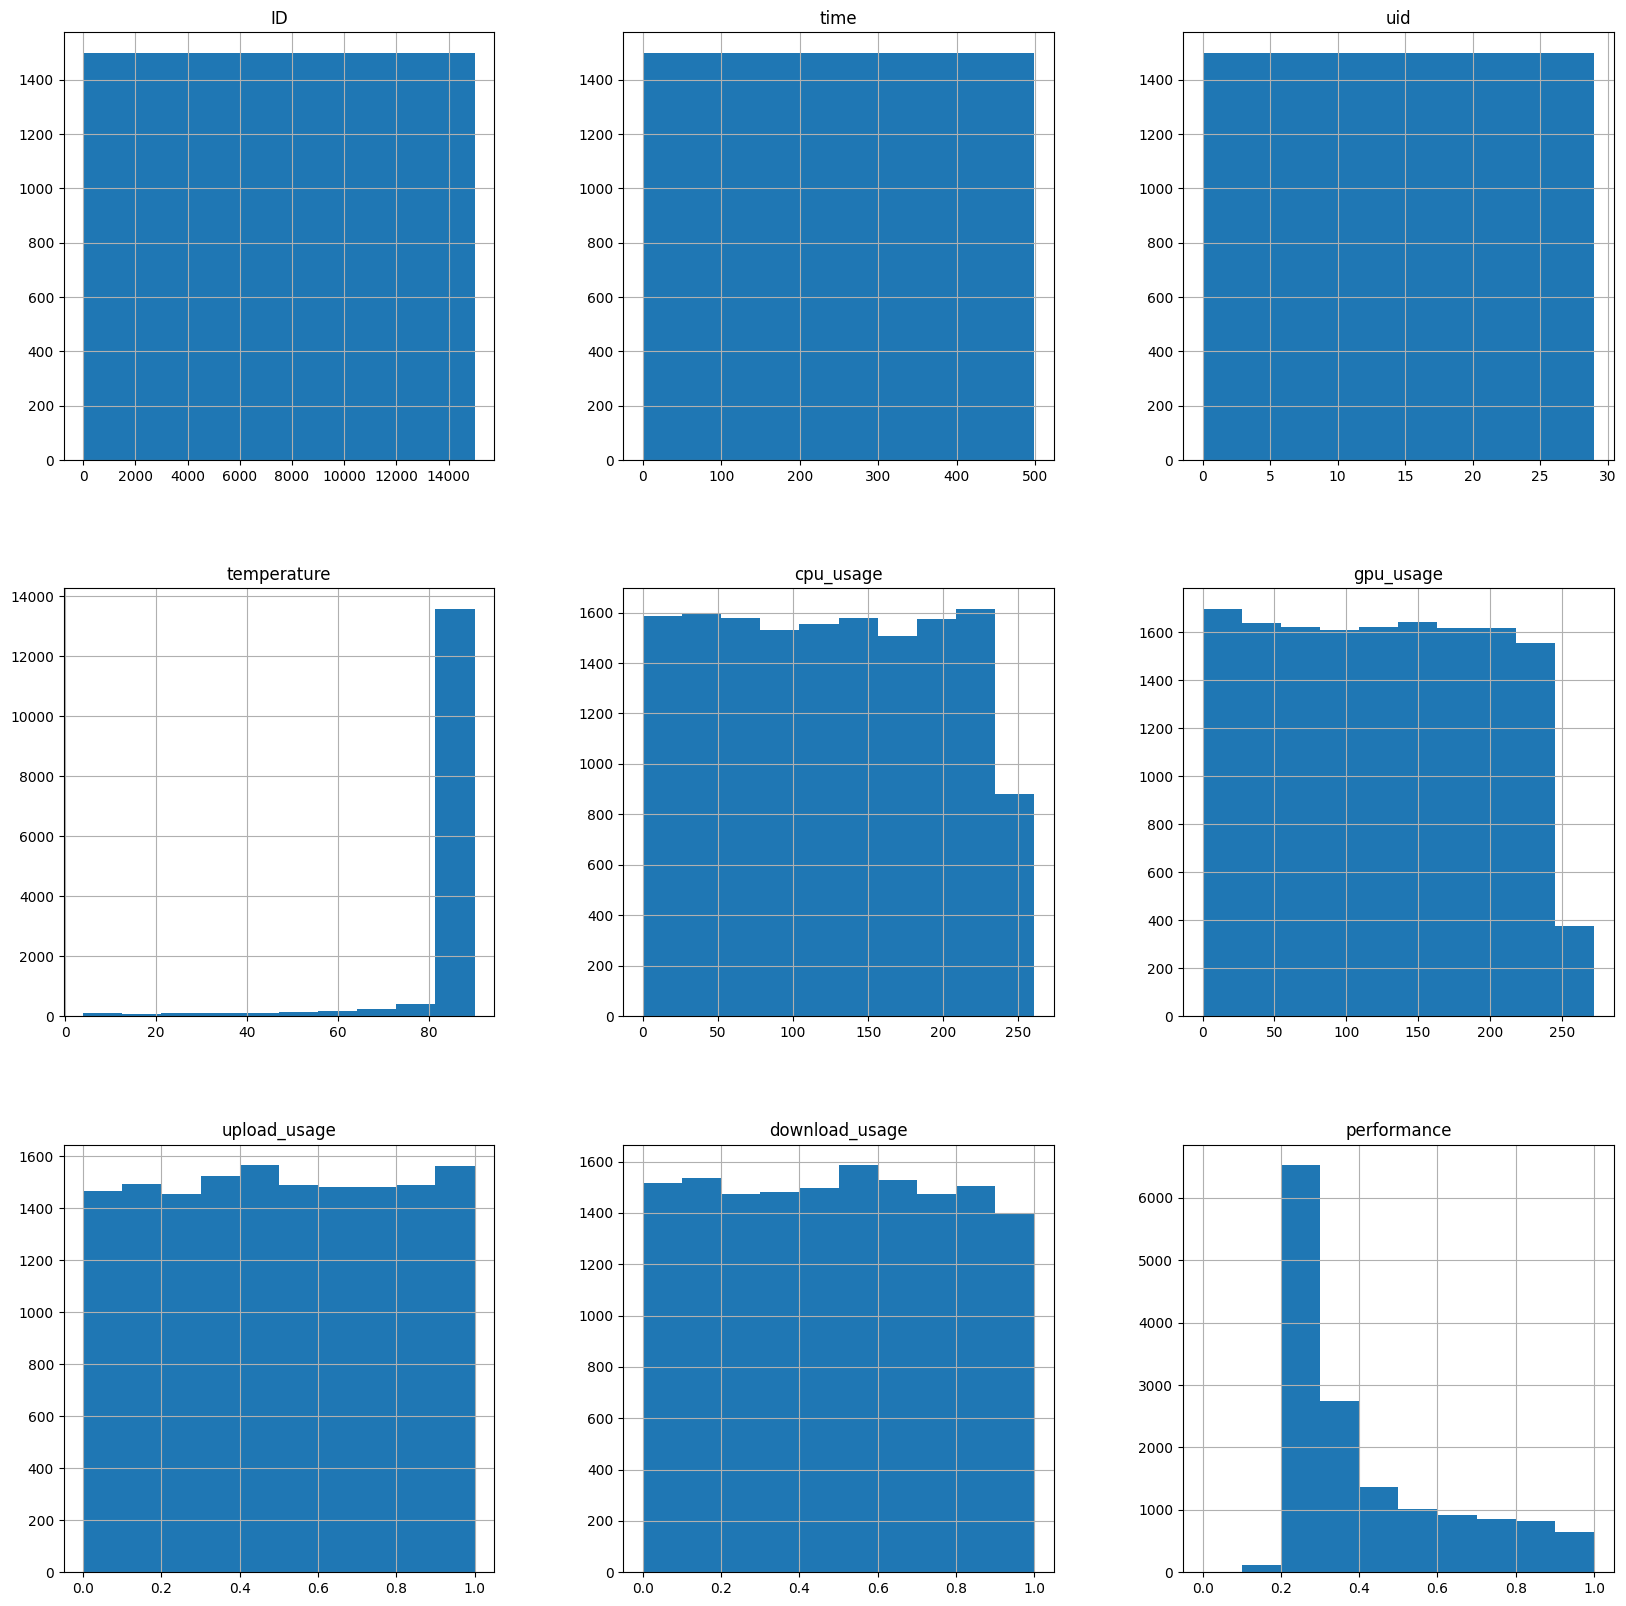

In [3]:
df.hist(figsize=(20,20))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              15000 non-null  int64  
 1   time            15000 non-null  int64  
 2   uid             15000 non-null  int64  
 3   serial          15000 non-null  object 
 4   model           15000 non-null  object 
 5   temperature     15000 non-null  float64
 6   cpu_usage       15000 non-null  float64
 7   gpu_usage       15000 non-null  float64
 8   upload_usage    15000 non-null  float64
 9   download_usage  15000 non-null  float64
 10  performance     15000 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 1.3+ MB


Valido valores nulos en el dataset

In [5]:
df.isna().sum()

ID                0
time              0
uid               0
serial            0
model             0
temperature       0
cpu_usage         0
gpu_usage         0
upload_usage      0
download_usage    0
performance       0
dtype: int64

Elimino las columnas "ID" y "serial" porque no tienen relación con el fallo o rendimiento

In [6]:
df = df.drop(['ID','serial'], axis=1)
df

,time,uid,model,temperature,cpu_usage,gpu_usage,upload_usage,download_usage,performance
0,0,0,C,3.943849,0.498604,0.291258,0.724379,0.107881,1.000
1,0,1,A,3.943849,0.845603,0.518143,0.708684,0.009955,1.000
2,0,2,C,3.943849,0.075949,0.838743,0.564937,0.688424,1.000
3,0,3,B,3.943849,0.077407,0.686753,0.804593,0.062835,1.000
4,0,4,B,3.943849,0.481766,0.442025,0.006727,0.665060,1.000
...,...,...,...,...,...,...,...,...,...
14995,499,25,B,90.000000,243.609056,269.060143,0.436031,0.120899,0.208
14996,499,26,A,90.000000,241.890345,249.286210,0.352901,0.544579,0.218
14997,499,27,C,90.000000,246.126026,249.868530,0.995627,0.770770,0.240
14998,499,28,C,90.000000,240.052671,236.176575,0.915995,0.527004,0.232


Codifico la columna "model" porque tiene valores categóricos, entonces la paso a númericos con Label Encoding

In [7]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, dtype=int)  # para evitar booleanos
encoded_model = encoder.fit_transform(df[["model"]])
encoded_cols = encoder.get_feature_names_out(["model"])

df_encoded = pd.DataFrame(encoded_model, columns=encoded_cols)
df = pd.concat([df.drop(columns=["model"]), df_encoded], axis=1)
df

,time,uid,temperature,cpu_usage,gpu_usage,upload_usage,download_usage,performance,model_A,model_B,model_C
0,0,0,3.943849,0.498604,0.291258,0.724379,0.107881,1.000,0,0,1
1,0,1,3.943849,0.845603,0.518143,0.708684,0.009955,1.000,1,0,0
2,0,2,3.943849,0.075949,0.838743,0.564937,0.688424,1.000,0,0,1
3,0,3,3.943849,0.077407,0.686753,0.804593,0.062835,1.000,0,1,0
4,0,4,3.943849,0.481766,0.442025,0.006727,0.665060,1.000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14995,499,25,90.000000,243.609056,269.060143,0.436031,0.120899,0.208,0,1,0
14996,499,26,90.000000,241.890345,249.286210,0.352901,0.544579,0.218,1,0,0
14997,499,27,90.000000,246.126026,249.868530,0.995627,0.770770,0.240,0,0,1
14998,499,28,90.000000,240.052671,236.176575,0.915995,0.527004,0.232,0,0,1


Creo la variable objetivo, pero teniendo en cuenta que a menor rendimiento hay mayor probabilidad al fallo:
* Fallo = 1 si "performance" es menor a un indicador (0.98)
* Fallo = 0 si "performance" es alto (unidad estable)

Siendo así un problema de clasificación binaria

In [8]:
df["fallo"] = (df["performance"] < 0.98).astype(int)
df
print(df["fallo"].value_counts(normalize=True))

fallo
1    0.978133
0    0.021867
Name: proportion, dtype: float64


Con esto se concluye que hay más datos de fallos detectados

### Correlaciones con la variable objetivo

In [9]:
df.columns

Index(['time', 'uid', 'temperature', 'cpu_usage', 'gpu_usage', 'upload_usage',
       'download_usage', 'performance', 'model_A', 'model_B', 'model_C',
       'fallo'],
      dtype='object')

In [10]:
numeric_cols = df.columns
corr = df[numeric_cols].corr()

print(corr["fallo"].sort_values(ascending=False))

fallo             1.000000
temperature       0.699459
time              0.249435
cpu_usage         0.248278
gpu_usage         0.246193
model_A           0.021097
model_B           0.005635
uid              -0.001001
download_usage   -0.001200
upload_usage     -0.002736
model_C          -0.023696
performance      -0.396045
Name: fallo, dtype: float64


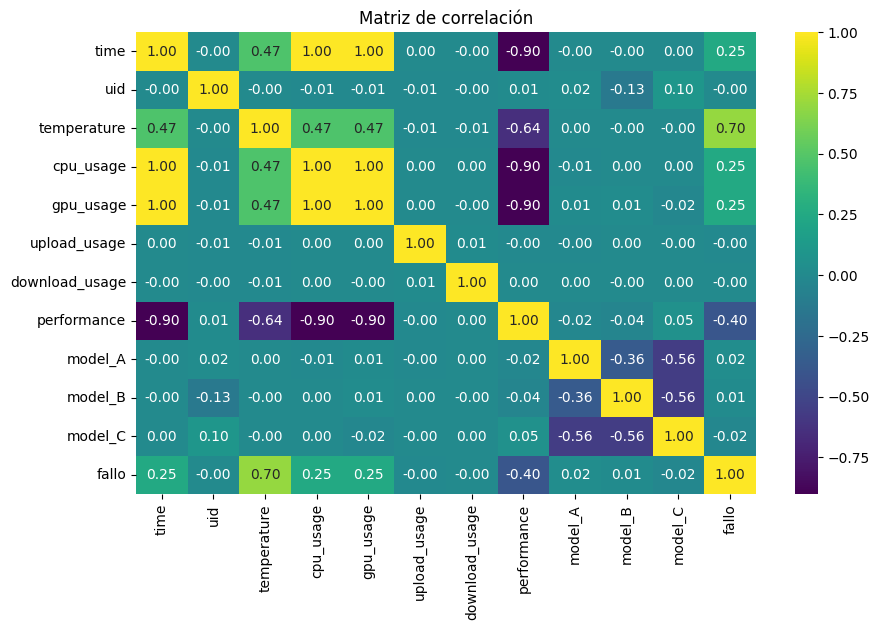

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="viridis", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

Teniendo las variables identificadas correlacionadas con la variable objetivo es posible tener hipotesis más seguras:
* A mayor "temperature", "time", "cpu_usage" y "gpu_usage" es propenso a fallar el dispositivo
* A menor "upload_usage", y demás variables tienede a fallar menos el dispositivo

Esto permite seleccionar las variables relevantes en el modelo y eliminar las que no aportan.

In [12]:
df = df.drop(['model_A','model_B','uid','download_usage','upload_usage','model_C','performance'], axis=1)
df

,time,temperature,cpu_usage,gpu_usage,fallo
0,0,3.943849,0.498604,0.291258,0
1,0,3.943849,0.845603,0.518143,0
2,0,3.943849,0.075949,0.838743,0
3,0,3.943849,0.077407,0.686753,0
4,0,3.943849,0.481766,0.442025,0
...,...,...,...,...,...
14995,499,90.000000,243.609056,269.060143,1
14996,499,90.000000,241.890345,249.286210,1
14997,499,90.000000,246.126026,249.868530,1
14998,499,90.000000,240.052671,236.176575,1


# Preparación del modelo

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [14]:
X_train = df.drop(columns=["fallo"])
y_train = df["fallo"]

In [15]:
df_test = pd.read_csv('/kaggle/input/devices-error-detection-acmud-2025/test.csv')
df_test

,ID,time,uid,serial,model,temperature,cpu_usage,gpu_usage,upload_usage,download_usage
0,0,0,0,983fae13ac9e7010201475bdcd5425c1,B,3.943849,0.119858,0.551513,0.557788,0.582262
1,1,0,1,ee39ab0beab33d095bc8412f1face877,A,3.943849,0.136291,0.514332,0.125882,0.934079
2,2,0,2,9657956caf7eb2a287ffaaf1c057db7d,A,3.943849,0.984491,0.836589,0.898724,0.164784
3,3,0,3,d5b9742195a68893154c481ce074e1ac,A,3.943849,0.804333,0.459606,0.418496,0.849472
4,4,0,4,20f91577af0aa30af0673b08bd8d28b8,B,3.943849,0.179484,0.265105,0.970877,0.262936
...,...,...,...,...,...,...,...,...,...,...
14995,14995,499,25,d80c8c9ff97b43865e6a0d493780c112,C,90.000000,252.920953,252.794245,0.875644,0.341621
14996,14996,499,26,3e8e690acb2ae857e90893df45121ee8,B,90.000000,255.008661,243.619659,0.693551,0.388309
14997,14997,499,27,d8ddc9a61024228df225aef3ab2d522c,A,90.000000,245.546571,242.309741,0.247926,0.276499
14998,14998,499,28,27b4f3a9c47d71f74552ad419940de73,A,90.000000,254.727876,248.595564,0.940234,0.595139


In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              15000 non-null  int64  
 1   time            15000 non-null  int64  
 2   uid             15000 non-null  int64  
 3   serial          15000 non-null  object 
 4   model           15000 non-null  object 
 5   temperature     15000 non-null  float64
 6   cpu_usage       15000 non-null  float64
 7   gpu_usage       15000 non-null  float64
 8   upload_usage    15000 non-null  float64
 9   download_usage  15000 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 1.1+ MB


In [17]:
df_test.isna().sum()

ID                0
time              0
uid               0
serial            0
model             0
temperature       0
cpu_usage         0
gpu_usage         0
upload_usage      0
download_usage    0
dtype: int64

In [18]:
X_test = df_test.drop(['ID','uid','serial','model','download_usage','upload_usage'], axis=1)
X_test

,time,temperature,cpu_usage,gpu_usage
0,0,3.943849,0.119858,0.551513
1,0,3.943849,0.136291,0.514332
2,0,3.943849,0.984491,0.836589
3,0,3.943849,0.804333,0.459606
4,0,3.943849,0.179484,0.265105
...,...,...,...,...
14995,499,90.000000,252.920953,252.794245
14996,499,90.000000,255.008661,243.619659
14997,499,90.000000,245.546571,242.309741
14998,499,90.000000,254.727876,248.595564


#### Regresión Logística

In [19]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [20]:
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]

In [21]:
print(f"Resultados para Regresión Logística")
print(classification_report(y_train, y_pred_log))
print(f"ROC-AUC: {roc_auc_score(y_train, y_prob_log):.4f}")
print("-" * 50)

Resultados para Regresión Logística
              precision    recall  f1-score   support

           0       0.68      0.59      0.63       328
           1       0.99      0.99      0.99     14672

    accuracy                           0.98     15000
   macro avg       0.84      0.79      0.81     15000
weighted avg       0.98      0.98      0.98     15000

ROC-AUC: 0.9916
--------------------------------------------------


Random Forest

In [22]:
modelo_rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [23]:
y_pred_rf = modelo_rf.predict(X_test)
y_prob_rf = modelo_rf.predict_proba(X_test)[:, 1]

In [24]:
print(f"Resultados para Random Forest")
print(classification_report(y_train, y_pred_rf))
print(f"ROC-AUC: {roc_auc_score(y_train, y_prob_rf):.4f}")
print("-" * 50)

Resultados para Random Forest
              precision    recall  f1-score   support

           0       0.65      0.52      0.58       328
           1       0.99      0.99      0.99     14672

    accuracy                           0.98     15000
   macro avg       0.82      0.76      0.79     15000
weighted avg       0.98      0.98      0.98     15000

ROC-AUC: 0.9896
--------------------------------------------------


XGBoost

In [25]:
modelo_xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.01,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)
modelo_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [26]:
y_pred_xgb = modelo_xgb.predict(X_test)
y_prob_xgb = modelo_xgb.predict_proba(X_test)[:, 1]

In [27]:
print(f"Resultados para XGBoost")
print(classification_report(y_train, y_pred_xgb))
print(f"ROC-AUC: {roc_auc_score(y_train, y_prob_xgb):.4f}")
print("-" * 50)

Resultados para XGBoost
              precision    recall  f1-score   support

           0       0.65      0.55      0.59       328
           1       0.99      0.99      0.99     14672

    accuracy                           0.98     15000
   macro avg       0.82      0.77      0.79     15000
weighted avg       0.98      0.98      0.98     15000

ROC-AUC: 0.9917
--------------------------------------------------


In [28]:
submission = pd.read_csv("/kaggle/input/devices-error-detection-acmud-2025/sample_submission.csv")
submission

,ID,Fallos
0,0,1
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
14995,14995,0
14996,14996,0
14997,14997,1
14998,14998,1


In [29]:
submission['Fallos'] = y_pred_rf
submission

,ID,Fallos
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
14995,14995,1
14996,14996,1
14997,14997,1
14998,14998,1


In [30]:
submission.to_csv("test_submission.csv", index=False)